In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


My Goal is to first doing the Univariate analysis of each feature so that I can get better intuation about each categories of the features meaning that whose frequency is more as compared to the other category.

**VISUALIZING THE DATASET**

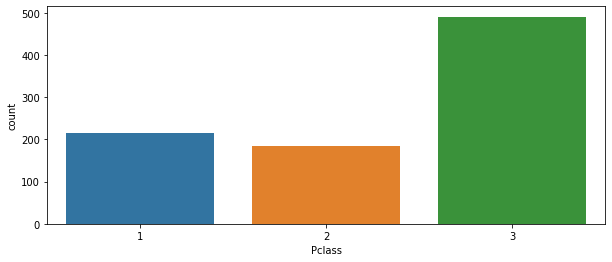

In [6]:
plt.figure(figsize=(10,4))
sns.countplot(dataset['Pclass'])

It shows that there is more passengers travelling from third class. We can say that the maximun travellers may be middle class or below middle class.

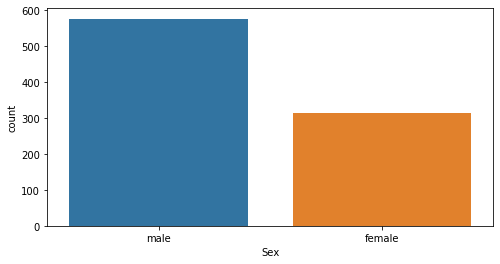

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(dataset['Sex'])

It shows that the number of male passengers are more as compared to the female ones and no transgenders

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

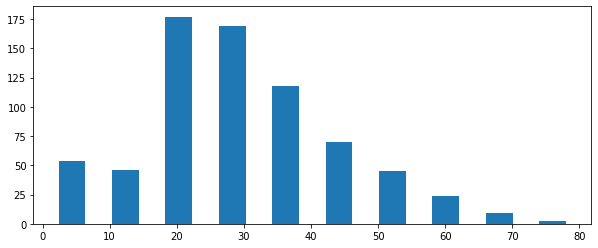

In [8]:
plt.figure(figsize=(10,4))
plt.hist(dataset['Age'], rwidth=0.5)

Mostly youngsters were the passengers and a very few whose age is 70-80.

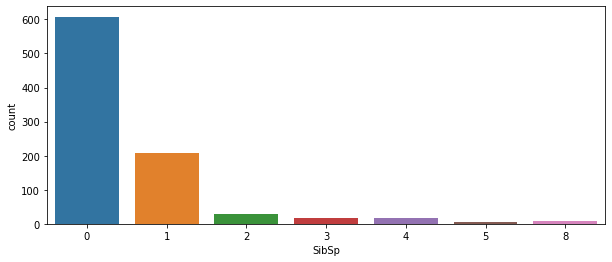

In [9]:
plt.figure(figsize=(10,4))
sns.countplot(dataset['SibSp'])

SibSp means Number of Siblings/Spouse board the ship. We can see that Maximum people travelled alone.

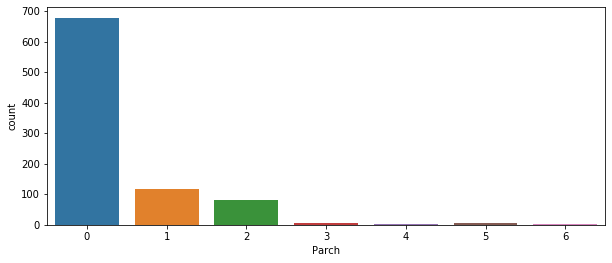

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(dataset['Parch'])

Parch means Parents/Children. Again, Most passengers travelled alone.

Text(0, 0.5, 'No. of Passengers')

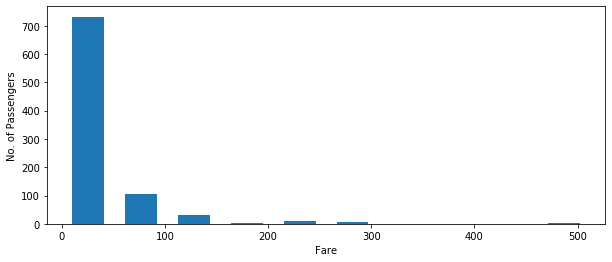

In [11]:
plt.figure(figsize=(10,4))
plt.hist(x='Fare', data = dataset, rwidth=0.6)
plt.xlabel('Fare')
plt.ylabel('No. of Passengers')

Most of the people paid less than 100 (currency).

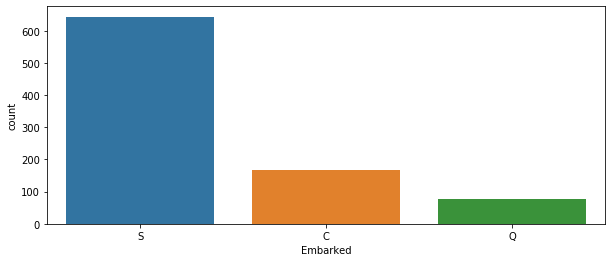

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(dataset['Embarked'])

Embarked meaning the ports from where the passenegers board the ship. Here 'S' means Southampton, 'C' means Cherbourg and 'Q' means Queenstown. Maximum passengers aboard from Southampton and about 150 passengers from Cherbourg and about 100 from Queenstown. Looks like Southampton was the busiest one !

**Bivariate Analysis**

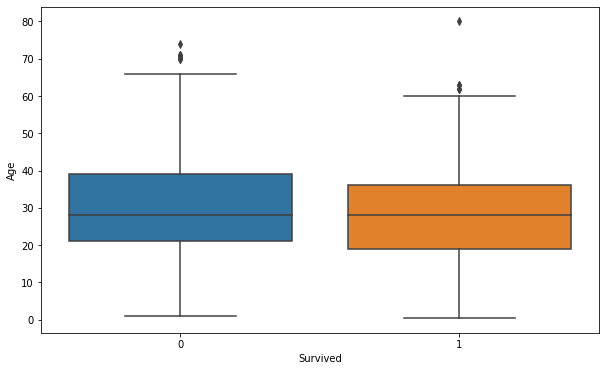

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(dataset['Survived'], dataset['Age'])

From this distribution we can say that the mean age of both Not Survived (0) and the survived ones (1) has almost the same age around 29 years. 

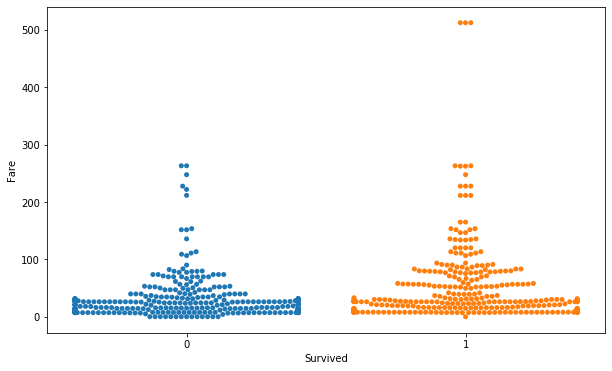

In [14]:
plt.figure(figsize=(10,6))
sns.swarmplot(dataset['Survived'], dataset['Fare'])

From this we can easily say that few richest passengers have been survived and majority middle class or we can say that those who paid up to 100 (currency) had survived.

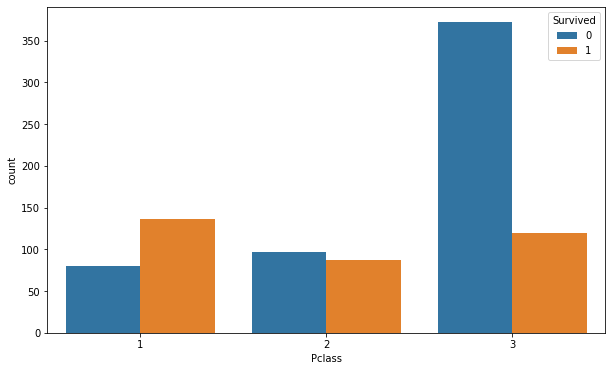

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(dataset['Pclass'], hue=dataset['Survived'])

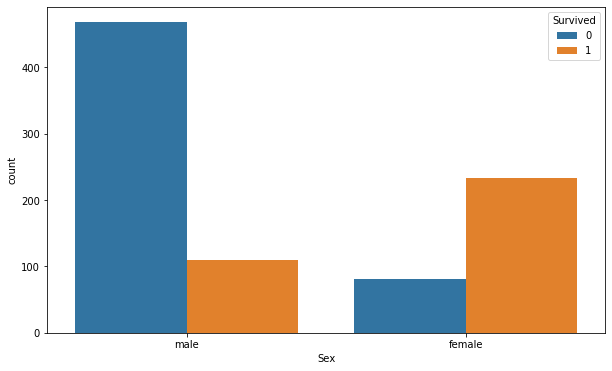

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(dataset['Sex'], hue=dataset['Survived'])

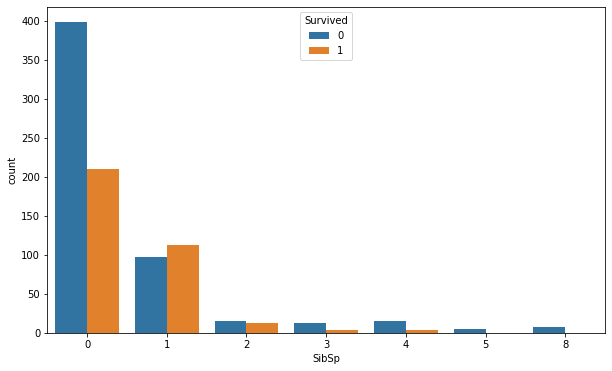

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(dataset['SibSp'], hue=dataset['Survived'])

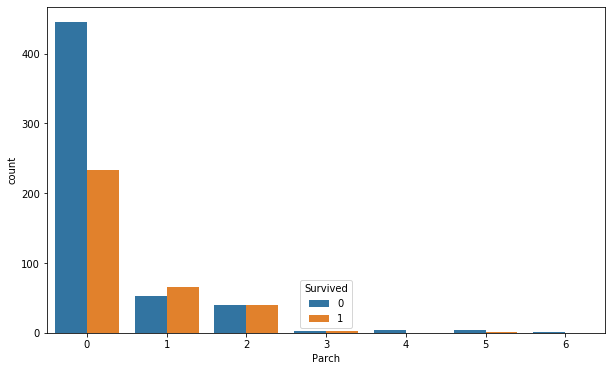

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(dataset['Parch'], hue=dataset['Survived'])

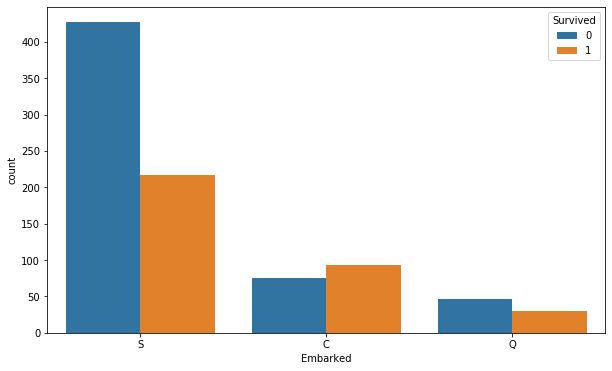

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(dataset['Embarked'], hue=dataset['Survived'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


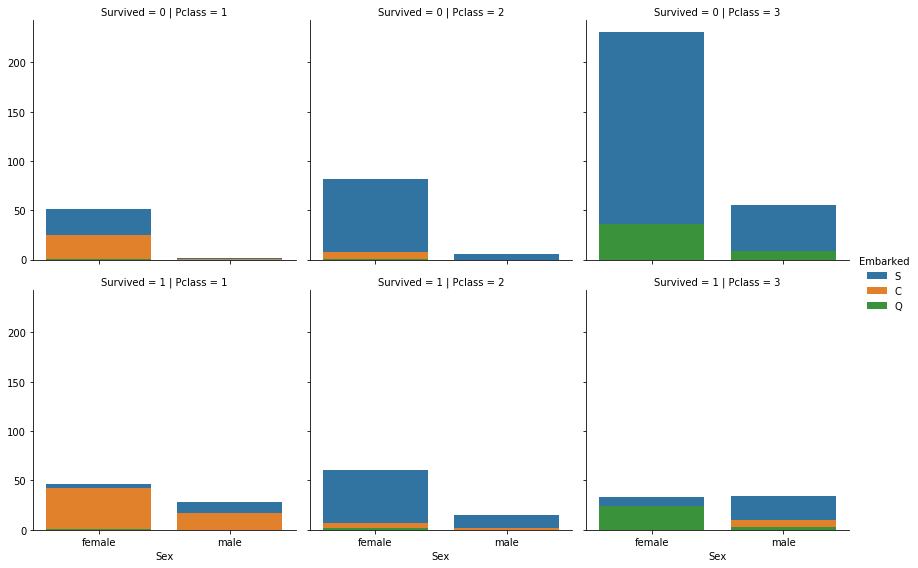

In [20]:
sns.FacetGrid(row='Survived', col='Pclass', hue='Embarked', data=dataset, size=4).map(sns.countplot, 'Sex').add_legend()

**Visualizing NaNs**

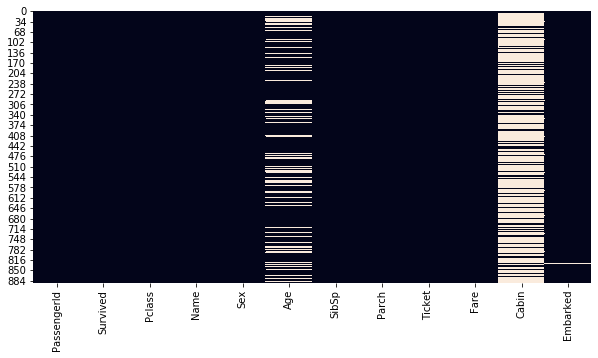

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.isnull(), cbar=False)

From this, we can see that the column 'Cabin' has more NaNs. So, We won't consider this as a feature in our ML model.

In [22]:
pd.isna(dataset).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
pd.isna(test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Filling out the NaN**

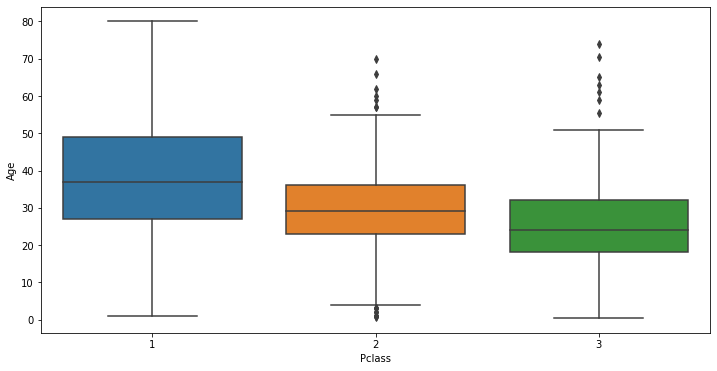

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y= 'Age', data=dataset)

Here, When we plot the Age vs Pclass boxplot, We can observe that The mean age of Pclass 1 is about 38 which is more than the Pclass 2 and Pclass 3. So, My goal is to impute the NaN according to their Pclass.

In [31]:
def impute_NaN(cols):
    Age = cols[0]
    Pclass = cols[1]
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 38
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age

In [32]:
dataset['Age'] = dataset[['Age', 'Pclass']].apply(impute_NaN, axis=1)

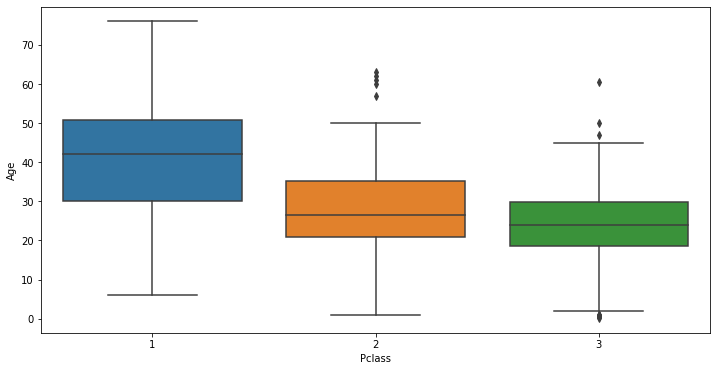

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y= 'Age', data=test)

In [34]:
def impute_NaN(cols):
    Age = cols[0]
    Pclass = cols[1]
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 42
        elif(Pclass==2):
            return 25
        else:
            return 23
    else:
        return Age

In [35]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_NaN, axis=1)